# Assignment 3
### Due 9/21. Do four of five.

## Helen Corbat

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [25]:
df = pd.read_csv("nhanes_data_17_18.csv")
df.head()


C:\Users\Owner\AppData\Local\Temp\ipykernel_11772\751835075.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("nhanes_data_17_18.csv")


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_meta = pd.read_csv("nhanes_meta_17_18.csv")
df_meta.head()

,VariableNameLong,Variable,Type,Format,Informat,Label,Source,VariableName,SASLabel,EnglishText,Target,VariableNameLong_variable_df,Source_variable_df,EnglishInstructions,HardEdits,Recoded,CustomRecoding,nNonNA
0,GeneralHealthCondition,HSD010,Numeric,NaN,NaN,General health condition,HSQ,HSD010,General health condition,Next I have some general questions about {your...,Both males and females 12 YEARS -\n\n\t\t\t15...,GeneralHealthCondition,HSQ,NaN,NaN,True,NaN,5964.0
1,EverBreastfedOrFedBreastmilk,DBQ010,Numeric,NaN,NaN,Ever breastfed or fed breastmilk,DBQ,DBQ010,Ever breastfed or fed breastmilk,Now I'm going to ask you some general question...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,EverBreastfedOrFedBreastmilk,DBQ,NaN,NaN,True,YesNo,1069.0
2,AgeStoppedBreastfeedingdays,DBD030,Numeric,NaN,NaN,Age stopped breastfeeding(days),DBQ,DBD030,Age stopped breastfeeding(days),How old was {SP} when {he/she} completely stop...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeStoppedBreastfeedingdays,DBQ,NaN,NaN,False,NaN,862.0
3,AgeFirstFedFormuladays,DBD041,Numeric,NaN,NaN,Age first fed formula(days),DBQ,DBD041,Age first fed formula(days),How old was {SP} when {he/she} was first fed f...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeFirstFedFormuladays,DBQ,NaN,NaN,False,NaN,1077.0
4,AgeStoppedReceivingFormuladays,DBD050,Numeric,NaN,NaN,Age stopped receiving formula(days),DBQ,DBD050,Age stopped receiving formula(days),How old was {SP} when {he/she} completely stop...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeStoppedReceivingFormuladays,DBQ,NaN,NaN,False,NaN,891.0


In [ ]:
df.isna().sum()[df.isna().sum() <500]


SEQN                                   0
Past30DayMilkProductConsumption        1
OfMealsNotHomePrepared                30
OfReadytoeatFoodsInPast30Days         32
OfFrozenMealspizzaInPast30Days        34
HaveSeriousDifficultyHearing           1
HaveSeriousDifficultySeeing            1
CoveredByHealthInsurance              20
WeightKg                             124
StandingHeightCm                     350
BodyMassIndexKgm2                    361
EverBeenToldYouHaveAsthma              7
Gender                                 0
AgeInYearsAtScreening                  0
RacehispanicOrigin                     0
RacehispanicOriginWNhAsian             0
TotalNumberOfPeopleInTheHousehold      0
TotalNumberOfPeopleInTheFamily         0
OfChildren5YearsOrYoungerInHh          0
OfChildren617YearsOldInHh              0
OfAdults60YearsOrOlderInHh             0
DoctorToldYouHaveDiabetes              4
TakingInsulinNow                       1
dtype: int64

In [ ]:
pd.crosstab(df['Gender'], df['TakingInsulinNow'])

TakingInsulinNow,0.0,1.0
Gender,,
Female,4160,112
Male,3958,135


In [ ]:
pd.crosstab(df['Gender'], df['TakingInsulinNow'],normalize = 'index')

TakingInsulinNow,0.0,1.0
Gender,,
Female,0.973783,0.026217
Male,0.967017,0.032983


From the contingency table above, it indicates that male has a higher likelyhood of taking insulin. The result is what I have expected though.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [ ]:
df.isna().sum()[df.isna().sum() < 500]

SEQN                                   0
Past30DayMilkProductConsumption        1
OfMealsNotHomePrepared                30
OfReadytoeatFoodsInPast30Days         32
OfFrozenMealspizzaInPast30Days        34
HaveSeriousDifficultyHearing           1
HaveSeriousDifficultySeeing            1
CoveredByHealthInsurance              20
WeightKg                             124
StandingHeightCm                     350
BodyMassIndexKgm2                    361
EverBeenToldYouHaveAsthma              7
Gender                                 0
AgeInYearsAtScreening                  0
RacehispanicOrigin                     0
RacehispanicOriginWNhAsian             0
TotalNumberOfPeopleInTheHousehold      0
TotalNumberOfPeopleInTheFamily         0
OfChildren5YearsOrYoungerInHh          0
OfChildren617YearsOldInHh              0
OfAdults60YearsOrOlderInHh             0
DoctorToldYouHaveDiabetes              4
TakingInsulinNow                       1
dtype: int64

In [ ]:
df.loc[:,['BodyMassIndexKgm2', 'Gender']].groupby('Gender').describe()

BodyMassIndexKgm2                                                   
                   count       mean       std   min   25%   50%   75%   max
Gender                                                                     
Female            4108.0  26.977142  8.797227  12.3  20.5  25.8  32.0  84.4
Male              3897.0  26.156223  7.633079  12.8  20.4  25.8  30.7  86.2

[Text(0.5, 1.0, 'KDE')]

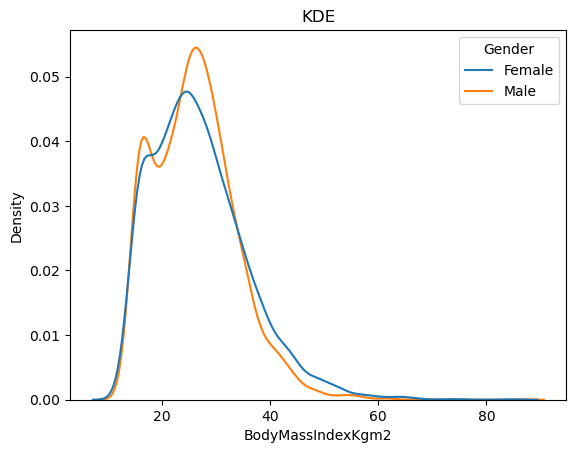

In [ ]:
sns.kdeplot( data=df, x='BodyMassIndexKgm2', hue='Gender', common_norm=False ).set(title='KDE')

From the KDE plot above, it showed that male is more likely to be overweight than female in BodyMassIndexKg range of 25-35 where female tends to be more severely overweight than male in the range of 35-60 BodyMassIndexKg.
The result is very interesting to me because I assumed that men were more likely to be overweight in all categories.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [29]:
import matplotlib.pyplot as plt

In [30]:
def lcls(x,y, h = None, plot=True):
    n = len(x) # Number of observations
    grid = np.sort(x.unique()) # Extract and sort unique values for x

    # Compute bandwidth, if none provided:
    if h is None:
        iqr = np.quantile(x,.75) - np.quantile(x,.25)
        h = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
        print(f'Computed bandwidth is: {h}')

    # Compute kernel:
    I = -(x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) )**2
    K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2 )

    # Compute LCLS estimator:
    numerator = y@K # Compute the numerator
    denominator = np.sum(K,axis=0) # Compute denominator
    y_hat = numerator/denominator # Compute estimator

    # Plot results:
    if plot:
        sns.scatterplot(y= y, x= x,alpha=.05)
        sns.lineplot(x=grid,y=y_hat, color='orange')
        plt.show()

    return y_hat, grid

In [22]:
df.isna().sum()[df.isna().sum() < 700]

SEQN                                   0
Past30DayMilkProductConsumption        1
OfMealsNotHomePrepared                30
OfReadytoeatFoodsInPast30Days         32
OfFrozenMealspizzaInPast30Days        34
HaveSeriousDifficultyHearing           1
HaveSeriousDifficultySeeing            1
CoveredByHealthInsurance              20
WeightKg                             124
StandingHeightCm                     350
BodyMassIndexKgm2                    361
EverBeenToldYouHaveAsthma              7
Gender                                 0
AgeInYearsAtScreening                  0
RacehispanicOrigin                     0
RacehispanicOriginWNhAsian             0
TotalNumberOfPeopleInTheHousehold      0
TotalNumberOfPeopleInTheFamily         0
OfChildren5YearsOrYoungerInHh          0
OfChildren617YearsOldInHh              0
OfAdults60YearsOrOlderInHh             0
DoctorToldYouHaveDiabetes              4
TakingInsulinNow                       1
dtype: int64

Computed bandwidth is: 3.646432653900023


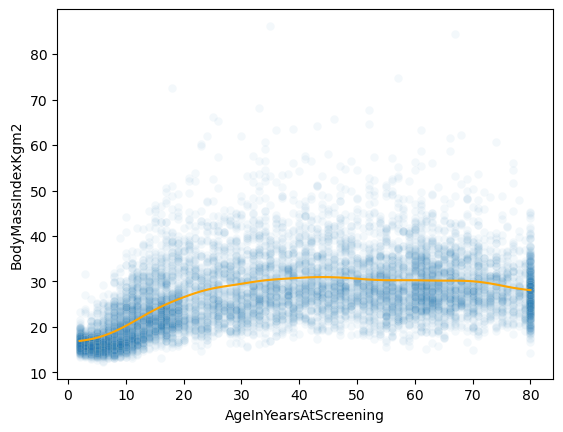

In [34]:
df_1 = df[['AgeInYearsAtScreening', 'BodyMassIndexKgm2']].dropna()
y_hat, grid = lcls(df_1['AgeInYearsAtScreening'],df_1['BodyMassIndexKgm2'])

From the lcls plot above, it showed that the change in weight over age is at a pretty steady pace. This outcome surprised me because I assumed that we would gain weight at a much faster rate when you get older, especially from age 40 to 60.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

<Axes: xlabel='AgeInYearsAtScreening', ylabel='BodyMassIndexKgm2'>

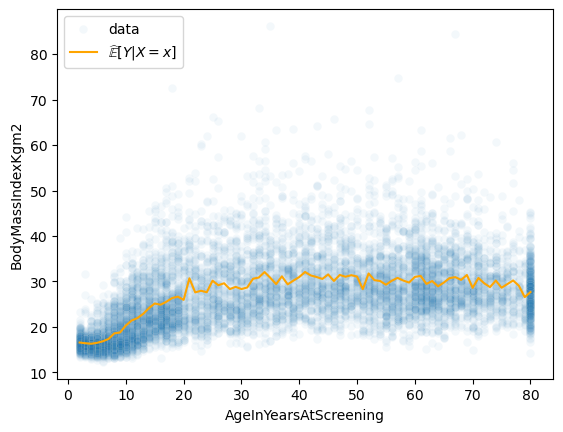

In [35]:
means = df.loc[:,['BodyMassIndexKgm2','AgeInYearsAtScreening']].groupby('AgeInYearsAtScreening').mean()
sns.scatterplot(data=df, y='BodyMassIndexKgm2', x='AgeInYearsAtScreening',alpha=.05, label='data')
sns.lineplot(data=means, x='AgeInYearsAtScreening',y='BodyMassIndexKgm2',color='orange', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')

From the CEF plot, it is clearly that BodyMassIndex increases between age 0 and 20. However, the relationship is not plausibly causal. There are many people who maintain a healthy weight through out their 20s. Therefore, there are missing variables that must explain the increase in BMI in the population, such as changes in eating habits, changes in exercising patterns, rising stress level as we get older, and changes in hormones.

Yes, as long as we are predicting sombody without changing any of those attributes, we can still predict Y based on X even Y is not directly caused by X.